<a href="https://colab.research.google.com/github/Harshavardhan1005/ANN/blob/main/Clustering_lat_and_lon_using_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from google.colab import output
output.enable_custom_widget_manager()

In [105]:
df = pd.read_csv('/content/drive/MyDrive/Cherry/kepler - Sheet1.csv')

In [106]:
df.head()

,partner,node,pincode,latitude,longitude,address,lat_long_status,dc_cord,node_cord,Distance,lm_category
0,M/S KRISHI BANDHU BHANDER,Krishnanagar (HQ),741163,23.804780,88.562722,",Tehatta-I ,Nadia ,West Bengal",True,"(23.80478,88.562722)","(25.9646932,85.2547887)",411.019962,Very Far
1,M/S BIJOY KUMAR BISWAS,Krishnanagar (HQ),741402,23.181806,88.470491,",Ranaghat-I ,Nadia ,West Bengal",True,"(23.181806,88.470491)","(25.9646932,85.2547887)",448.425222,Very Far
2,M/S SUBRATA DEY,Krishnanagar (HQ),741502,23.335490,88.643978,",Hanskhali ,Nadia ,West Bengal",True,"(23.33549,88.643978)","(25.9646932,85.2547887)",449.994015,Very Far
3,M/S Niharendu Saha,Krishnanagar (HQ),741152,23.981888,88.623381,",Karimpur-1 ,Nadia ,West Bengal",True,"(23.981888,88.623381)","(25.9646932,85.2547887)",404.854918,Very Far
4,M/S KALACHAND SARKAR,Krishnanagar (HQ),741161,23.426100,88.606559,",Krishnagar-I ,Nadia ,West Bengal",True,"(23.4261,88.606559)","(25.9646932,85.2547887)",440.551134,Very Far


In [107]:
df.shape

(104, 11)

In [108]:
df1 = df[['latitude','longitude']].dropna()
df1 = df1[df1['latitude'] != 0]

In [109]:
df1.head()

,latitude,longitude
0,23.804780,88.562722
1,23.181806,88.470491
2,23.335490,88.643978
3,23.981888,88.623381
4,23.426100,88.606559


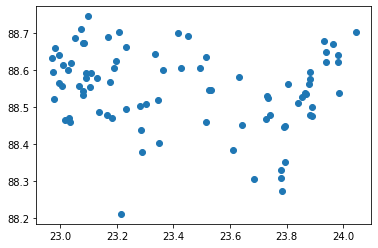

In [110]:
plt.scatter(df1['latitude'],df1['longitude'])

In [111]:
df1.isnull().sum()

latitude     0
longitude    0
dtype: int64

In [112]:
x = df1[['latitude','longitude']]

In [113]:
Kmean = KMeans(n_clusters=9)
Kmean.fit_predict(x)

array([1, 5, 4, 8, 4, 0, 7, 3, 6, 2, 0, 0, 0, 0, 0, 7, 0, 7, 6, 6, 6, 0,
       1, 3, 7, 6, 1, 4, 2, 8, 2, 5, 5, 5, 7, 1, 5, 5, 6, 3, 6, 7, 6, 2,
       0, 3, 4, 0, 4, 7, 2, 0, 1, 1, 1, 8, 1, 8, 3, 7, 7, 7, 4, 2, 4, 4,
       6, 0, 4, 5, 4, 8, 8, 8, 0, 1, 7, 0, 1, 1, 3, 2, 1, 2, 5, 5],
      dtype=int32)

In [114]:
Kmean.cluster_centers_

array([[23.09358393, 88.53290421],
       [23.87706017, 88.53326317],
       [23.72357075, 88.490948  ],
       [23.73815667, 88.32527583],
       [23.4580272 , 88.6041096 ],
       [23.27508611, 88.43635633],
       [23.147186  , 88.67705411],
       [23.00144   , 88.60894773],
       [23.96957857, 88.65525586]])

In [115]:
df1['cluster'] = Kmean.labels_

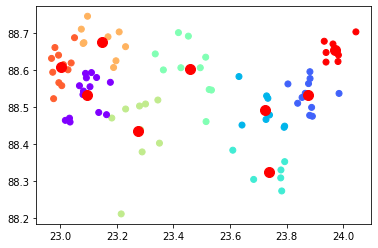

In [116]:
plt.scatter(df1['latitude'],df1['longitude'],c=df1['cluster'],cmap='rainbow')
for i in range(9):
  plt.scatter(Kmean.cluster_centers_[i][0], Kmean.cluster_centers_[i][1], s=100, c='r', marker='o')
plt.show()

In [117]:
wcss = []
for i in range(1,57):
  kmeans = KMeans(i)
  kmeans.fit(x)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

Text(0, 0.5, 'WCSS Values')

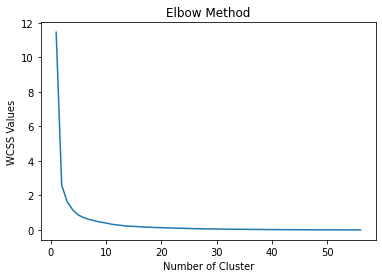

In [118]:
number_clusters = range(1,57)
plt.plot(number_clusters,wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Cluster')
plt.ylabel('WCSS Values')

In [119]:
df1.shape

(86, 3)

In [ ]:
!pip install keplergl

In [132]:
from keplergl import KeplerGl
map_1 = KeplerGl(height=500,data={"data": df1})
map_1

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(data={'data':       latitude  longitude  cluster
0    23.804780  88.562722        1
1    23.181806  8…